# **Imporing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/advertising.csv')

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
pd.DataFrame(df.isnull().sum(),columns =["Count of Null Values"])

,Count of Null Values
TV,0
Radio,0
Newspaper,0
Sales,0


# **visualization**

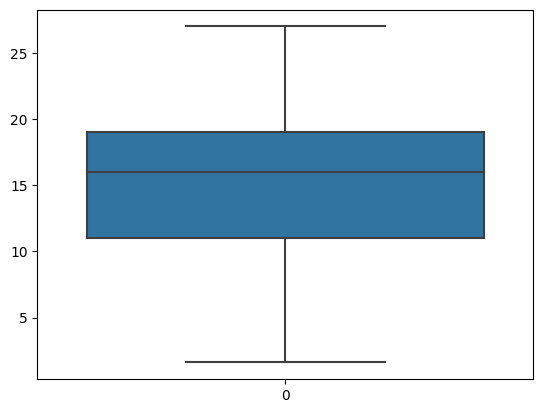

In [ ]:
sns.boxplot(df['Sales'])
plt.show()

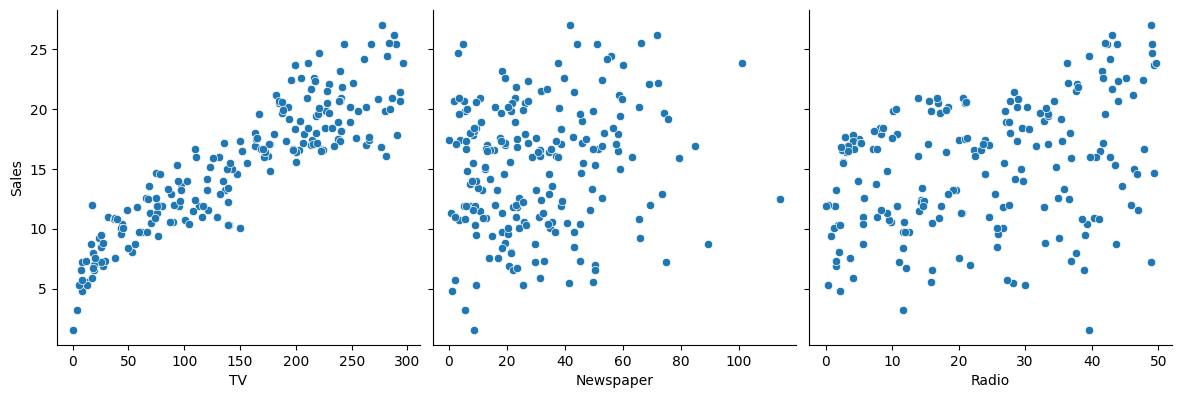

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

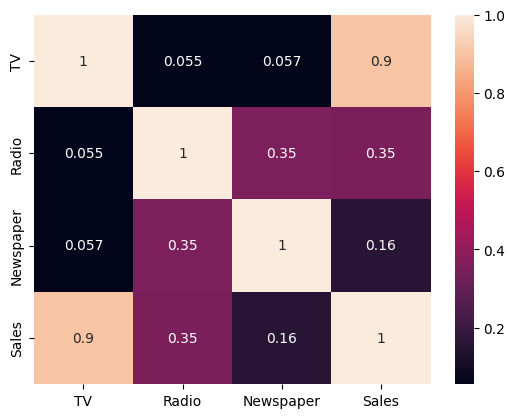

In [ ]:
sns.heatmap(df.corr(),annot = True)
plt.show()

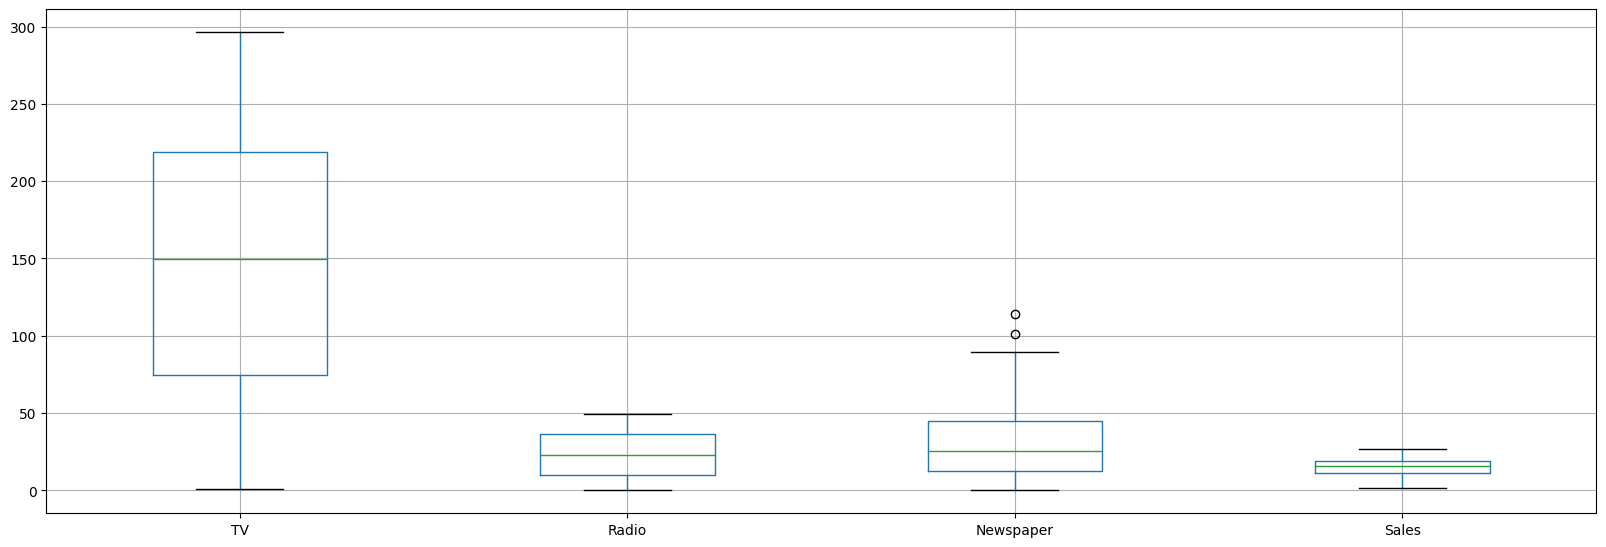

In [ ]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

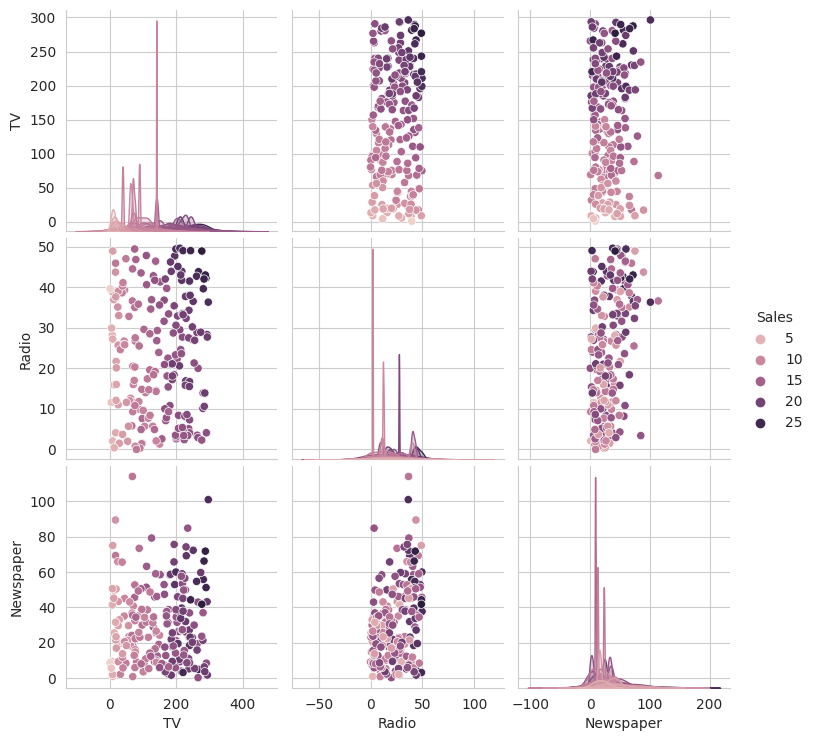

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='Sales')

# **Data Standardization**

In [ ]:
x=df[["TV"]]
y=df["Sales"]

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
model=s.fit_transform(x)
model

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

# **Trainig the Model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

# **Linear Regression**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

# models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print("R2 score", r2_score(y_test,predlr))
print("MEAN SQUARED ERROR", mean_squared_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))
print("Intercept",lr.intercept_)
lr.coef_

R2 score 0.7281352744078883
MEAN SQUARED ERROR 5.34850349246385
RMSE 2.312683180304611
Intercept 6.995532914307688


array([0.05410548])

In [ ]:
print("The LR model is: Y = ",lr.intercept_, "+", lr.coef_,"TV")

The LR model is: Y =  6.995532914307688 + [0.05410548] TV


<Axes: xlabel='Sales'>

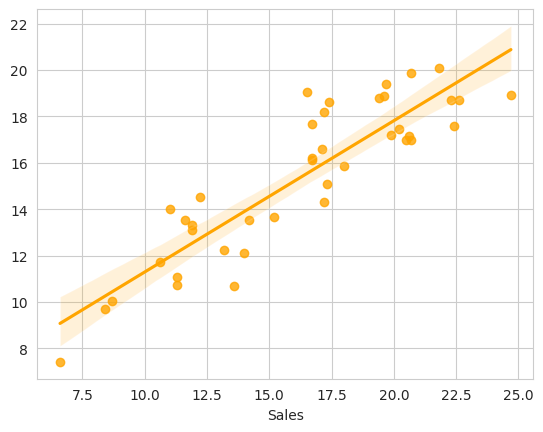

In [ ]:
sns.regplot(x=y_test, y=predlr,color='orange')

In [ ]:
diff = pd.DataFrame({'Actual':y_test,'Predicted':predlr})
diff.head()

,Actual,Predicted
126,6.6,7.417556
104,20.7,19.883459
99,17.2,14.310594
92,19.4,18.774296
111,21.8,20.072828


# **Multiple Linear Regression**

In [ ]:
X = df.drop(['Sales'],axis=1)
Y=df['Sales']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=15)
print(x_train.shape)

(160, 3)


In [ ]:
MLR = LinearRegression()
MLR.fit(x_train,y_train)
y_pred = MLR.predict(x_test)
print("R2 score", r2_score(y_test,y_pred))
print("MEAN SQUARED ERROR", mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Intercept",MLR.intercept_)
MLR.coef_

R2 score 0.9097192734421631
MEAN SQUARED ERROR 2.7111099053683656
RMSE 1.6465448385538626
Intercept 4.403301064986735


array([0.05579385, 0.10182203, 0.00415545])

In [ ]:
print("The LR model is: Y = ",MLR.intercept_, "+", MLR.coef_[0], "TV + ", MLR.coef_[1], "radio + ", MLR.coef_[2], "newspaper")

The LR model is: Y =  4.403301064986735 + 0.05579385181816195 TV +  0.1018220299202035 radio +  0.004155447835227241 newspaper


<Axes: xlabel='Sales'>

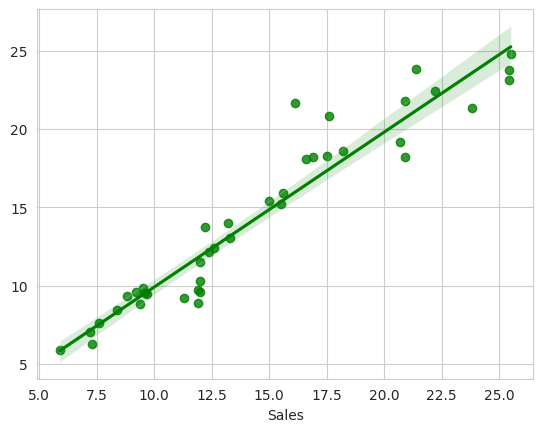

In [ ]:
sns.regplot(x=y_test, y=y_pred,color='green')

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
49,9.7,9.480148
191,11.9,9.740347
12,9.2,9.578992
172,7.6,7.614126
127,11.9,8.916198


# **Ridge**

In [ ]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print("R2 score",r2_score(y_test,predr))
print("MEAN SQUARED ERROR",mean_squared_error(y_test,predr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predr)))

R2 score 0.9097183986053141
MEAN SQUARED ERROR 2.711136176522103
RMSE 1.6465528161957341


In [ ]:
print(r.intercept_)
r.coef_

4.4033629425012855


array([0.05579381, 0.10181867, 0.00415624])

In [ ]:
print("The LR model is: Y = ",MLR.intercept_, "+", r.coef_[0], "TV + ", r.coef_[1], "radio + ", r.coef_[2], "newspaper")

The LR model is: Y =  4.403301064986735 + 0.05579380683256421 TV +  0.10181867158524477 radio +  0.004156236768683928 newspaper


<Axes: xlabel='Sales'>

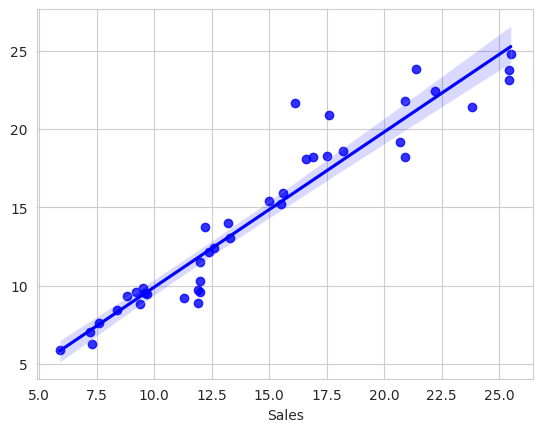

In [ ]:
sns.regplot(x=y_test, y=predr,color='blue')

# **lasso**

In [ ]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print("R2 score",r2_score(y_test,predl))
print("MSE",mean_squared_error(y_test,predl))
print("RMSE",np.sqrt(mean_squared_error(y_test,predl)))

R2 score 0.9096192727258334
MSE 2.7141129043795864
RMSE 1.6474564954436843


In [ ]:
print(l.intercept_)
l.coef_

4.548292050347422


array([0.0556774 , 0.09782178, 0.00308772])

In [ ]:
print("The LR model is: Y = ",l.intercept_, "+", l.coef_[0], "TV + ", l.coef_[1], "radio + ", l.coef_[2], "newspaper")

The LR model is: Y =  4.548292050347422 + 0.05567740258268367 TV +  0.09782177763590387 radio +  0.003087723824184681 newspaper


<Axes: xlabel='Sales'>

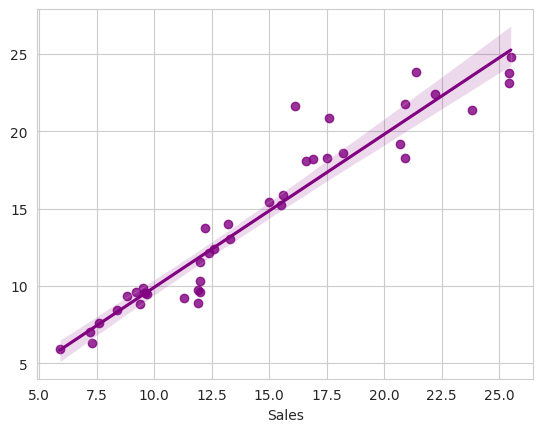

In [ ]:
sns.regplot(x=y_test, y=predr,color='purple')

Tv has high correlation with sales and through tv advertisement sales will increase rapidly.